## Problem Statement

### You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [139]:
import numpy as np
import pandas as pd

In [140]:
df=pd.read_csv(r"happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [141]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### About the Columns

- 1. Country:- It is country name according to rank wise.
- 2. Region:-  An area, especially part of a country or the world having definable characteristics but not always fixed boundaries.
- 3. Happiness Rank:- According to the happiness score the rank has been given to the countries.
- 4. Happiness Score:- This is Target column of our happyness. It is predicted to considering all the other factors.
- 5. Standard Error:- The standard error of the mean, or simply standard error, indicates how different the population mean is likely to be from a sample mean. It tells you how much the sample mean would vary if you were to repeat a study using new samples from within a single population.
- 6. Economy (GDP per Capita):- The headline result is clear: the richer the country, on average, the higher the level of self-reported happiness. The simple correlation suggests that doubling GDP per person lifts life satisfaction by about 0.7 points.
- 7. Family:- The family is a constant in a person's life. ... This connection to fond memories, support in times of need, and unconditional love is the unique way that families can bring happiness, stress relief, and a sense of well-being.
- 8:- Health (Life Expectancy):- As proven in many studies good health promotes higher levels of happiness and happiness promotes better health.
- 9:-Freedom:- It is found that the level of economic freedom in US states has a positive effect on both individual reported happiness and state average happiness. Dynamic panel analysis is also conducted both as a robustness check and in an effort to control for endogeneity.
- 10:- Trust (Government Corruption):- The negative relationship between perceived corruption and life satisfaction is larger in more developed countries and regions, relative to that in developing areas.
- 11:- Generosity:- Other studies have shown a link between generosity and happiness. Some studies have found that people are happier when spend- ing money on others than on themselves, and this happiness motivates them to be generous in the future.
- 12:- Dystopia Residual:- Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

In [142]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [143]:
df.shape

(158, 12)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

##### Great! There is no Null values present in the data set. so we good to go.

In [145]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Outcome of describe of datasets:
 From the above describing method we are determinig mean, standard deviation, minimum & maximum value of each column. It helps us further in data cleaning.
- Total Number of Rows in Dataset: 158
- Total Number of Column in Dataset: 12
###### Happiness Rank: - This is nominal data, somewhere I Definetly drop this.
- mean=79.49
- Std= 45.75
- Min= 1
- Max= 158
###### Happiness Score:- Target or Label
- mean= 5.37
- Std= 1.14
- Min= 2.83
- Max= 7.58
###### Standard Error:
- Mean=0.047
- Std =0.017
- Min = 0.018
- Max =0.136
######    Economy (GDP per Capita):-
- Mean=0.846
- Std =0.403
- Min = 0.0
- Max =1.69
###### Family:-
- Mean=0.991
- Std =0.272
- Min = 0.0
- Max =1.40
###### Health (Life Expectency)
- Mean=0.630
- Std =0.247
- Min = 0.0
- Max =1.025
###### Freedom
- Mean=0.428
- Std =0.150
- Min = 0.0
- Max =0.669
###### Trust(Govnerment Corruption)
- Mean=0.143
- Std =0.120
- Min = 0.0
- Max =0.5519
###### Generosity
- Mean=0.237
- Std =0.126
- Min = 0.0
- Max =0.795
###### Dystopia Residual
- Mean=2.09
- Std =0.553
- Min = 0.328
- Max = 3.602

# EDA

In [146]:
## Droping the unnecessary columns
# columns 'Country', 'Region', 'Happiness Rank are object data type the also those are not take any impact to predict the target 
# so we will drop them

In [147]:
df=df.drop(columns=['Country', 'Region', 'Happiness Rank'],axis=1)
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

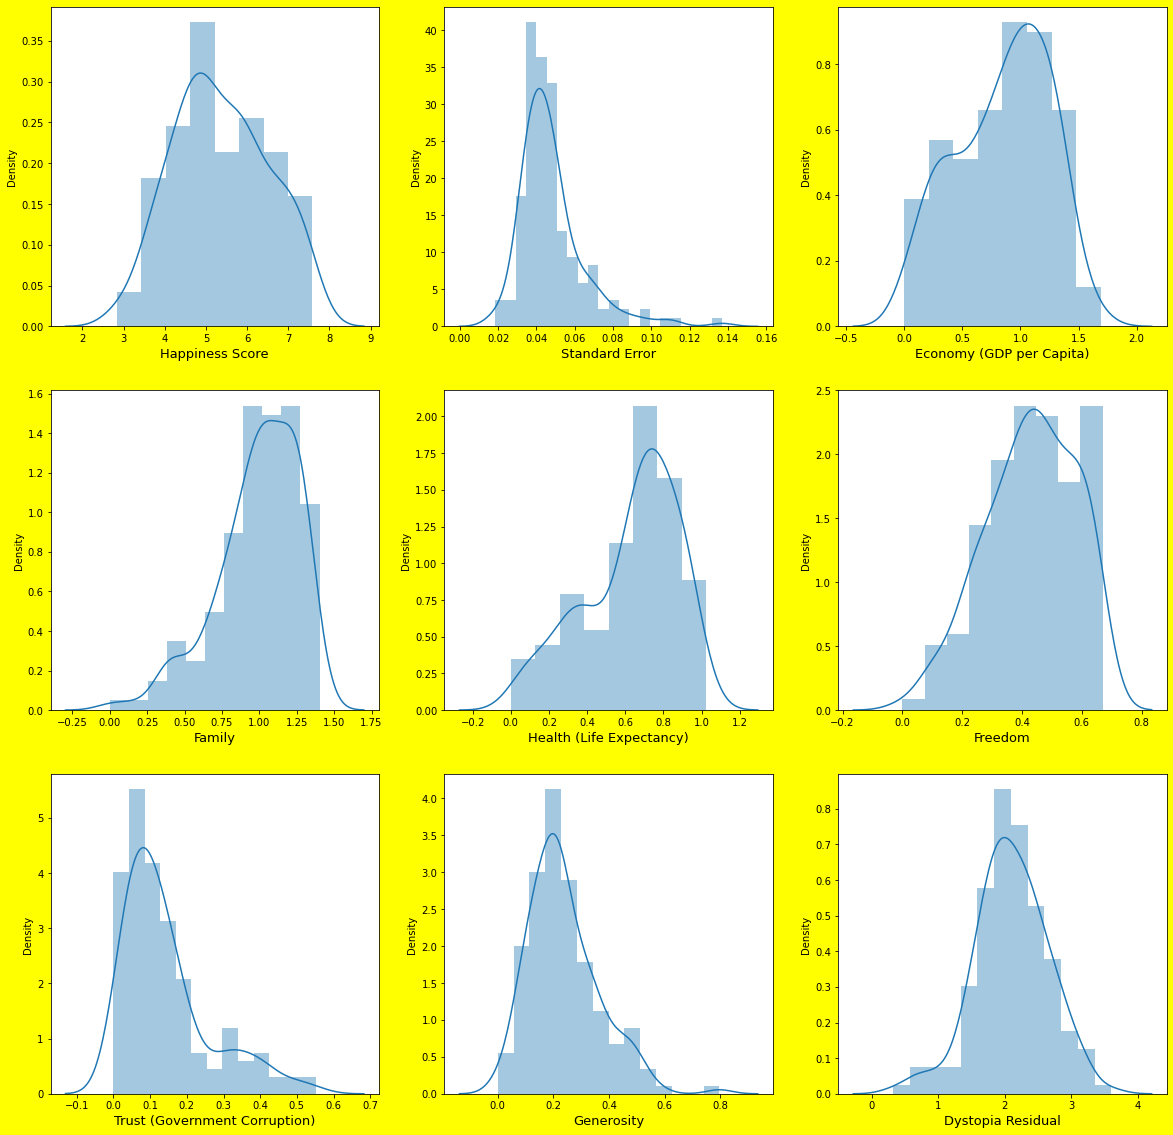

In [148]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.tight_layout

### Observation of Normal Distribution
- 1. Standard Error:- The data of the column is not normalised.The building blocks is out of the normalised curve.
- 2. Economy (GDP per Capita):- The data of the column is quite enough normalised. But the building blocks is little bit out of the normalised curve.
- 3. Family:- The data of the column is not normalised. The building blocks is out of the normalised curve.
- 4. Health (Life Expectancy):- The data of the column is not normalised. The building blocks is out of the normalised curve.
- 5. Freedom:- The data of the column is quite enough normalised. but the building bloks is little bit out of the normalised curve.
- 6. Trust(Government Corruption):- The data of the column is not normalised. The building blocks is out of the normalised curve.
- 7. Generosity:- The data of the column is not normalised. The building blocks is out of the normalised curve.
- 8. Dystopia Residual:- The data of the column is not normalised. The building block is out of the normalised curve.

#### Checking the skewness report:

In [149]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

### Observation of Above Skewness:-
##### Columns which are having most skewness-
- Standard Error
- Family
- Trust (Government Corruption)
- Generosity



## Checking the correlation between the columns.

<AxesSubplot:>

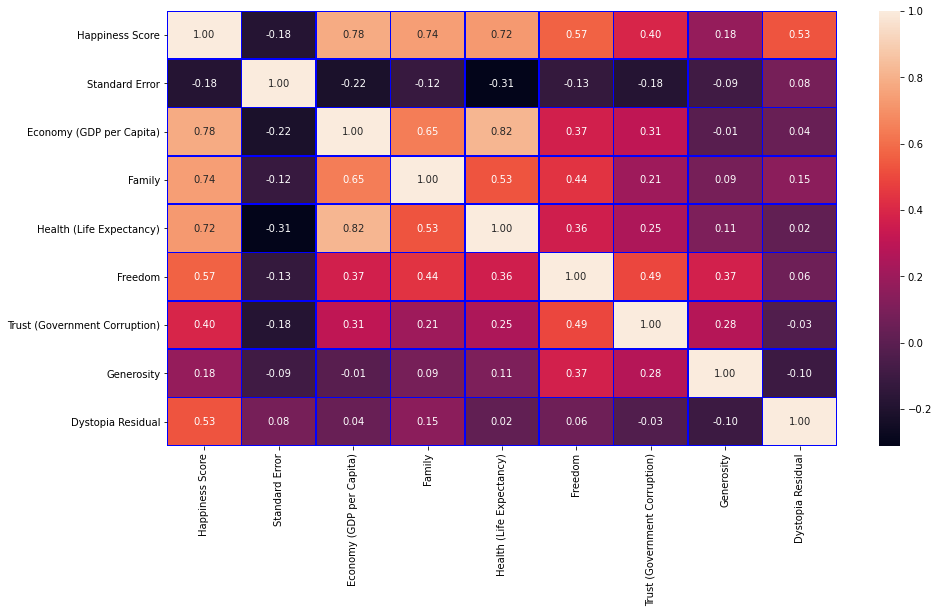

In [150]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.7,linecolor='b',fmt='.2f')


## observation of heatmap
###### All the columns or the dataset is positively correlated with the target column but only Standard Error is negative correlated with the target column.
- Standard Error is 18% negatively correlated with the Target column which can be considered as a weak bond.
- Economy (GDP per Capita) is 78% positively correlated with the target column which can be considered as a strong bond.
- Family is 74% positively correlated with the target column which can be considered as a strong bond also.
- Again Health (Life expectancy) is 72% positively correlated with the target column which can be considered as a strong bond.
- Freedom is 57% positively correlated with the target column which can be considered as good bond.
- Trust (Government Corruption) is 40% correlated with the target column which can be considered as a good bond also.
- Generosity is only 18% positively correlated with the target column which can be considered as weak bond.
- Dystopia Residual is 53% positively correlated with the target column which can be considered as good bond.

## Multicollinearity Problem:-
 As we know correlation mean how label are related to feature, similarly multicollinearity mean how my feature or variables are related to each other  features i.e. feature vs feature.
 - In the above heatmap we can clearly see that column Health (Life expectancy) is tightly 82% correlated with Economy(GDP per capita).

### Plotting the scratter plot to find the relation between them

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

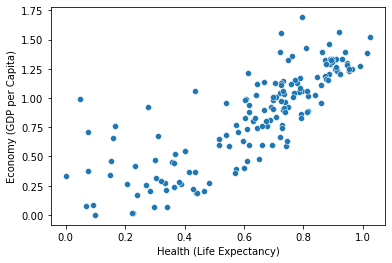

In [151]:
sns.scatterplot(x='Health (Life Expectancy)',y='Economy (GDP per Capita)',data=df)

## Observation of Scatterplot
As we can there is very good trend between Economy and health column. There  is tight correlation between both of them. So now I Will drop one of them.
- Economy (GDP per Capita) is 78% related with the target column.
- Health (Life Expectancy) is 72% related with the target column.
Health column little bit less related with the target as compare the economy column. So now we will drop Health (Life Expectancy) column

In [152]:
df=df.drop(columns=['Health (Life Expectancy)'],axis=1)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


# Outliers Checking

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

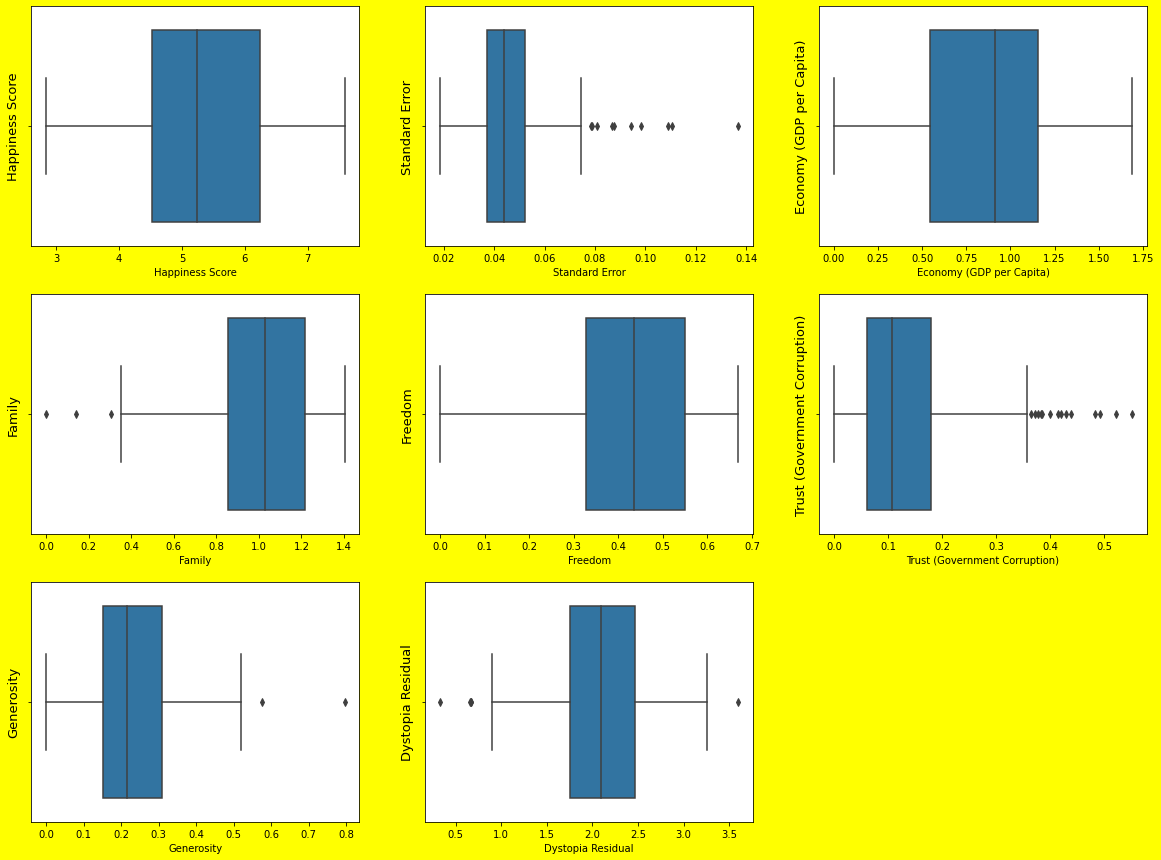

In [153]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.ylabel(column,fontsize=13)
    plotnumber+=1
plt.tight_layout


## Observation:-
In the above visualization, Standard Error, Family, Trust(Government Corruption), Generosity,Dystopia Residual column present outliers. But Trust (Government Corruption) and Standard Error columns have good amount of outliers.


## Removing Outliers
#### Find the IQR (Inter quantile Range) to identify outliers.


In [158]:
# Rename the columns
df.rename(columns={'Happiness Score':'Happiness_score','Standard Error':'StdError','Economy (GDP per Capita)':'Economy',
                   'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia'},inplace=True)
df

,Happiness_score,StdError,Economy,Family,Freedom,Trust,Generosity,Dystopia
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [159]:
# 1st quantile
q1=df.quantile(0.25)
# 3rd quantile
q3=df.quantile(0.75)
# IQR
iqr=q3-q1
# Outlier detection formula.
# higher side===> q3+(1.5*iqr)
# Lower side<=== q1-(1.5*iqr)


In [160]:
std_high=q3.StdError+(1.5*iqr.StdError)
std_high

0.07484874999999999

In [161]:
# check the indexes which have higher values
index=np.where(df['StdError']>std_high)
index

(array([ 39,  40,  62,  64,  93,  96, 100, 115, 125, 156], dtype=int64),)

In [162]:
# Dropping the index which we found in the above cell
df=df.drop(df.index[index])
print(df.shape)
print(df.reset_index())

(148, 8)
     index  Happiness_score  StdError  Economy   Family  Freedom    Trust  \
0        0            7.587   0.03411  1.39651  1.34951  0.66557  0.41978   
1        1            7.561   0.04884  1.30232  1.40223  0.62877  0.14145   
2        2            7.527   0.03328  1.32548  1.36058  0.64938  0.48357   
3        3            7.522   0.03880  1.45900  1.33095  0.66973  0.36503   
4        4            7.427   0.03553  1.32629  1.32261  0.63297  0.32957   
..     ...              ...       ...      ...      ...      ...      ...   
143    152            3.575   0.03084  0.31982  0.30285  0.23414  0.09719   
144    153            3.465   0.03464  0.22208  0.77370  0.59201  0.55191   
145    154            3.340   0.03656  0.28665  0.35386  0.48450  0.08010   
146    155            3.006   0.05015  0.66320  0.47489  0.15684  0.18906   
147    157            2.839   0.06727  0.20868  0.13995  0.36453  0.10731   

     Generosity  Dystopia  
0       0.29678   2.51738  
1       0.

<AxesSubplot:xlabel='StdError', ylabel='Density'>

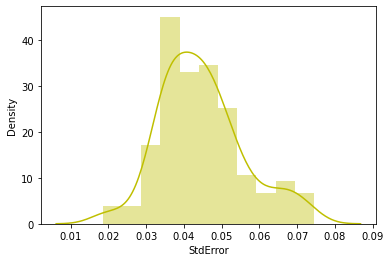

In [163]:
sns.distplot(df['StdError'],color='y')

Now, we can say that our StdError column's data are  quite normal distributed.

##### Similarly we find all the outliers for every column.

## Family

0.32044875000000017
(145, 8)


<AxesSubplot:xlabel='Family', ylabel='Density'>

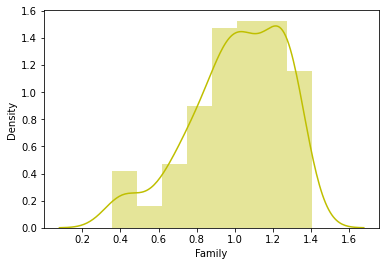

In [164]:
family_low=q1.Family-(1.5*iqr.Family)
print(family_low)
index=np.where(df['Family']<family_low)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()
sns.distplot(df['Family'],color='y')

Now the data of the column is normally distributed. The building blocks is in the normalised curve.

## Trust Column

0.35812499999999997
(131, 8)


<AxesSubplot:xlabel='Trust', ylabel='Density'>

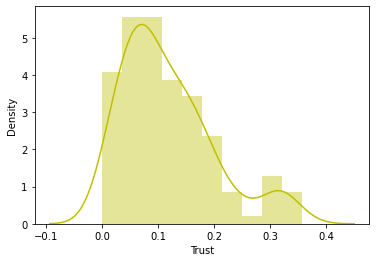

In [165]:
Trust_higher=q3.Trust+(1.5*iqr.Trust)
print(Trust_higher)
index=np.where(df['Trust']>Trust_higher)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()
sns.distplot(df['Trust'],color='y')

The data of column is looking quite fine distributed.


## Generosity

0.5488775
(129, 8)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

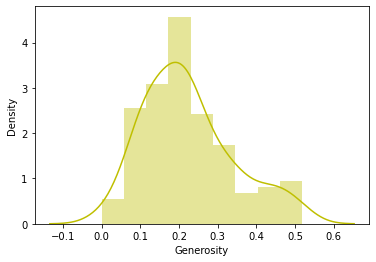

In [166]:
Gen_higher=q3.Generosity+(1.5*iqr.Generosity)
print(Gen_higher)
index=np.where(df['Generosity']>Gen_higher)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()
sns.distplot(df['Generosity'],color='y')

Now The data of the column is perfectly normalised. The building blocks are in the normalised curve.

## Dystopia

3.5169225
(128, 8)
0.7049024999999998
(126, 8)


<AxesSubplot:xlabel='Dystopia', ylabel='Density'>

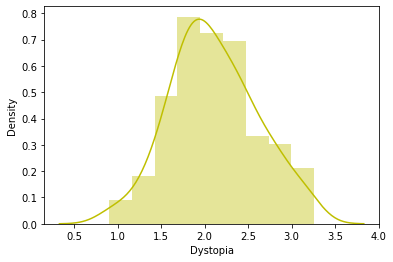

In [167]:
Dy_higher=q3.Dystopia+(1.5*iqr.Dystopia)
print(Dy_higher)
index=np.where(df['Dystopia']>Dy_higher)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

Dy_lower=q1.Dystopia-(1.5*iqr.Dystopia)
print(Dy_lower)
index=np.where(df['Dystopia']<Dy_lower)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()
sns.distplot(df['Dystopia'],color='y')



Now the data of the Dystopia is perfectly normalised.

In [168]:
df.shape

(126, 8)

# Now visualize once again

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

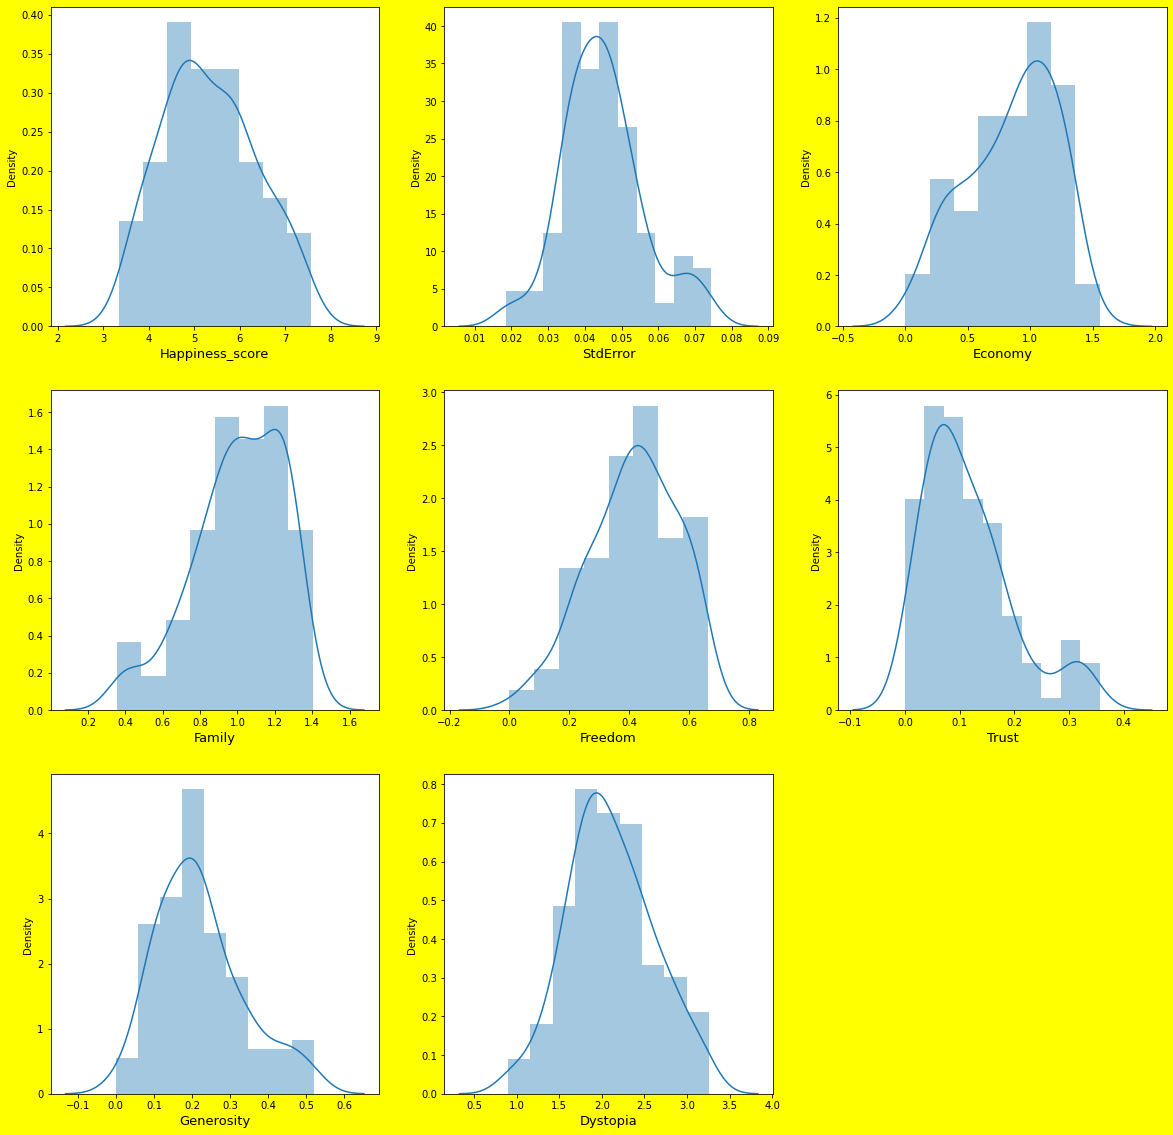

In [169]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.tight_layout 

##### We have detect the outliers and remove them that why our data is perfectly clean now. In the above visualization we can clearly see that our columns are perfectly normalised now.
#### So we good to go now!

In [170]:
# Separating the target
x=df.drop(columns=['Happiness_score'])
y=df['Happiness_score']

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.34566483,  1.25283359,  1.65489861,  1.47400151,  0.31133848,
         1.86909239,  1.20007282],
       [-0.85813255,  1.31874482,  1.32195703,  1.50279036,  2.59203442,
         2.05837274,  0.69743917],
       [-1.54007336,  1.3274065 ,  1.14448856,  1.38482463,  2.45346141,
         2.21450083,  0.72543802],
       [-0.37878423,  1.33879041,  1.26600679,  1.62802185,  2.91694752,
         1.86319093,  0.32525928],
       [-0.9332003 ,  1.05004039,  0.90931355, -0.00368891, -0.45972393,
         0.96148396,  1.97642842],
       [-0.04324041,  0.29993927,  0.96764732,  1.50820541, -0.12050496,
         0.29540109,  2.15466502],
       [-0.67905525,  1.34882696,  1.21503269,  1.44356759,  0.86065984,
         0.95419393,  0.86101353],
       [-0.59946534,  1.50633197,  1.00624379,  0.90692976,  0.5228957 ,
         1.56317159,  0.81463667],
       [-0.38511524,  0.36994761,  0.94669734,  0.52616298,  0.72063199,
        -0.65256285,  2.32083039],
       [-0.74688756,  1.3453

## Since the Outcome is continuous data So will Use Linear Regression model.

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=777,test_size=0.20)
lr.fit(x_train,y_train)    
    

LinearRegression()

In [174]:
#Adjusted R2 Score
lr.score(x_train,y_train)

0.9873156420880357

### Now check how our model fits the test data

In [175]:
lr.score(x_test,y_test)

0.9701445640503951

## Let's Plot and visualize

In [176]:
y_pred=lr.predict(x_test)

In [177]:
y_pred

array([7.41416753, 4.25409815, 4.09125668, 5.81847519, 5.82323164,
       4.97368172, 4.65760855, 6.93962723, 4.74750674, 5.87213363,
       4.44505713, 3.9195896 , 6.85587587, 4.76509222, 7.23388287,
       4.17580202, 5.57219588, 3.6742038 , 7.1033696 , 6.53909231,
       4.6281795 , 4.50413805, 5.2371801 , 4.59382124, 3.86947075,
       5.18780972])

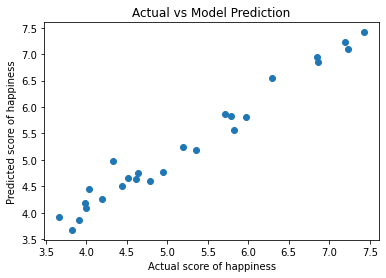

In [178]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual score of happiness')
plt.ylabel('Predicted score of happiness')
plt.title('Actual vs Model Prediction')
plt.show()

It is following some good Positive trend. It is not deviating too much. So now we can say that we predict quite good model.

## Model Evaluation:

In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [180]:
y_pred=lr.predict(x_test)

In [181]:
mean_absolute_error(y_test,y_pred)

0.1490609279885423

In [182]:
mean_squared_error(y_test,y_pred)

0.04058030951635157

In [183]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.20144554975563886

### The Total Results of Our Model 

- R2 Score= 0.9843212616528154
- Predicted_score is = 0.9612606503648216
- mean_absolute_error is = 0.18664305592806002
- mean_squared_error is = 0.052655563338994016
- Squareroot of mean_squared_error is = 0.22946800068635717

# Cross Validation score for Linear Regression:

Now let's check if our model is overfitting our data using regularization.

## Regularization

When we use regression models to train some data, there is a good chance that the model will overfit the given training dataset. Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by  reducing their corresponding weights.
- Let's see Lasso for regularization  in regression

#### Lasso (Least Absolute Shrinkage and selection operator) Regression (L1 form)
- Lasso regression penelizes the model based on the sum of the magnitude of the coefficients.
- LassoCv will retrun best alpha after max iteration.


In [184]:
from sklearn.linear_model import Lasso, LassoCV

In [185]:
lasso_cv=LassoCV(alphas=None,max_iter=100, normalize=True)
lasso_cv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [186]:
# Best alpha parameter
alpha=lasso_cv.alpha_
alpha

7.331665441902253e-05

In [187]:
# now  we have best parameter, let's  use lasso regression ans see how well our data has fitted before.
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=7.331665441902253e-05)

In [188]:
lasso_reg.score(x_test,y_test)

0.970135013073031

## Conclusion
R2 score is = 0.970135 which is same.
we got around same R2 score using Lasso regression as well so, it's safe to say there is no overfitting.

## Saving the model

In [189]:
import pickle

In [190]:
filename='happiness_score.pkl'
pickle.dump(lr,open(filename, 'wb'))